# 📌 Task 4: Sentiment Analysis using NLP
### Internship - CodeAlpha

---

## 🎯 Objective

In this task, we will analyze the **sentiment (emotion)** behind each quote.

We'll use a Natural Language Processing (NLP) tool called **TextBlob** to classify quotes as:
- **Positive** 😊
- **Negative** 😞
- **Neutral** 😐

This helps us understand the **emotional tone** of the text.

---



## 🔧 Step 1: Install Required Library

We’ll use the `textblob` library to perform sentiment analysis.

> ✅ Run the cell below to install it


In [ ]:
# !pip install textblob
from textblob import TextBlob

---

## 📂 Step 2: Load the Cleaned Dataset

We will use the file `quotes_data_cleaned.csv` which we prepared in the previous tasks.

Make sure this file is uploaded in your Colab environment.


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("quotes_data_cleaned.csv")

# If tags column is stored as string list, convert to actual list
df['tags'] = df['tags'].apply(eval)

df.head()


,quote,author,tags,quote_length
0,“Be yourself; everyone else is already taken.”...,Oscar Wilde,"[attributed-no-source, be-yourself, gilbert-pe...",60
1,"“I'm selfish, impatient and a little insecure....",Marilyn Monroe,"[attributed-no-source, best, life, love, misat...",221
2,"“So many books, so little time.” ― Frank Zappa",Frank Zappa,"[books, humor]",46
3,“Two things are infinite: the universe and hum...,Albert Einstein,"[attributed-no-source, human-nature, humor, in...",115
4,“A room without books is like a body without a...,Marcus Tullius Cicero,"[attributed-no-source, books, simile, soul]",77


---

## 🧠 Step 3: Analyze Sentiment of Each Quote

We will use `TextBlob` to calculate **polarity** of each quote:
- Positive polarity > 0 → **Positive**
- Polarity = 0 → **Neutral**
- Polarity < 0 → **Negative**

> We’ll define a function and apply it to the `quote` column.


In [ ]:
# Define a function to get sentiment category
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply it to the quotes
df['sentiment'] = df['quote'].apply(get_sentiment)

# Show updated data
df[['quote', 'sentiment']].head()


,quote,sentiment
0,“Be yourself; everyone else is already taken.”...,Neutral
1,"“I'm selfish, impatient and a little insecure....",Negative
2,"“So many books, so little time.” ― Frank Zappa",Positive
3,“Two things are infinite: the universe and hum...,Negative
4,“A room without books is like a body without a...,Neutral


In [ ]:
# calculate percentage of sentiment quotes
df['sentiment'].value_counts(normalize=True) * 100

,proportion
sentiment,
Positive,53.333333
Neutral,26.000000
Negative,20.666667


---

## 📊 Step 4: Visualize Sentiment Distribution

Let’s see how many quotes are:
- Positive
- Negative
- Neutral


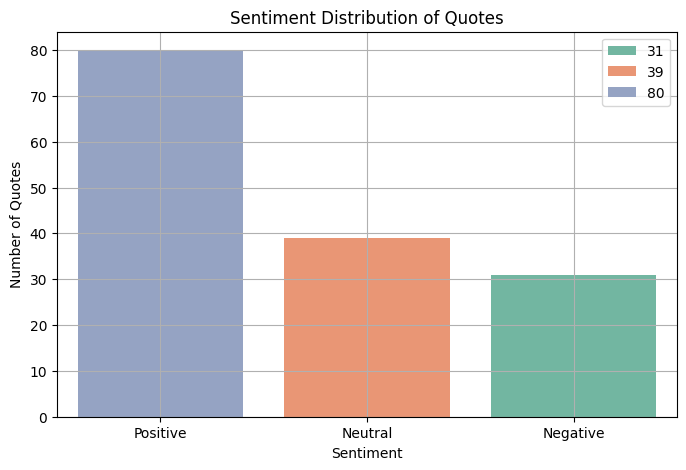

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count each sentiment type
sentiment_counts = df['sentiment'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values,hue=sentiment_counts.values,legend=True, palette='Set2')
plt.title("Sentiment Distribution of Quotes")
plt.xlabel("Sentiment")
plt.ylabel("Number of Quotes")
plt.grid(True)
plt.show()


---

## 🔍 Step 5: Sample Quotes for Each Sentiment

Let’s see one example of each type of quote.


In [ ]:
print("🔹 Positive Quote:\n", df[df['sentiment']=='Positive'].sample(1).iloc[0]['quote'])
print("\n🔹 Negative Quote:\n", df[df['sentiment']=='Negative'].sample(1).iloc[0]['quote'])
print("\n🔹 Neutral Quote:\n", df[df['sentiment']=='Neutral'].sample(1).iloc[0]['quote'])


🔹 Positive Quote:
 “I have not failed. I've just found 10,000 ways that won't work.” ― Thomas A. Edison

🔹 Negative Quote:
 “Life is what happens to us while we are making other plans.” ― Allen Saunders

🔹 Neutral Quote:
 “A reader lives a thousand lives before he dies, said Jojen. The man who never reads lives only one.” ― George R.R. Martin, A Dance with Dragons


## ✅ Step 6: Top Authors by Sentiment (Insight)

<Axes: title={'center': 'Most Positive Authors'}, xlabel='author'>

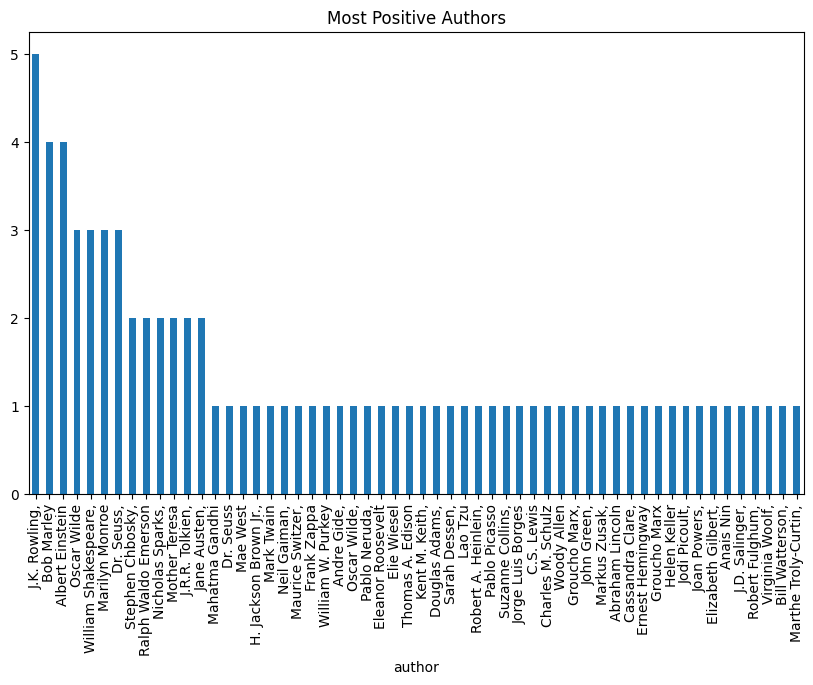

In [ ]:
# Most positive authors
df[df['sentiment'] == 'Positive']['author'].value_counts().plot(kind='bar', figsize=(10, 6), title='Most Positive Authors')



<Axes: title={'center': 'Most Positive Authors'}, xlabel='author'>

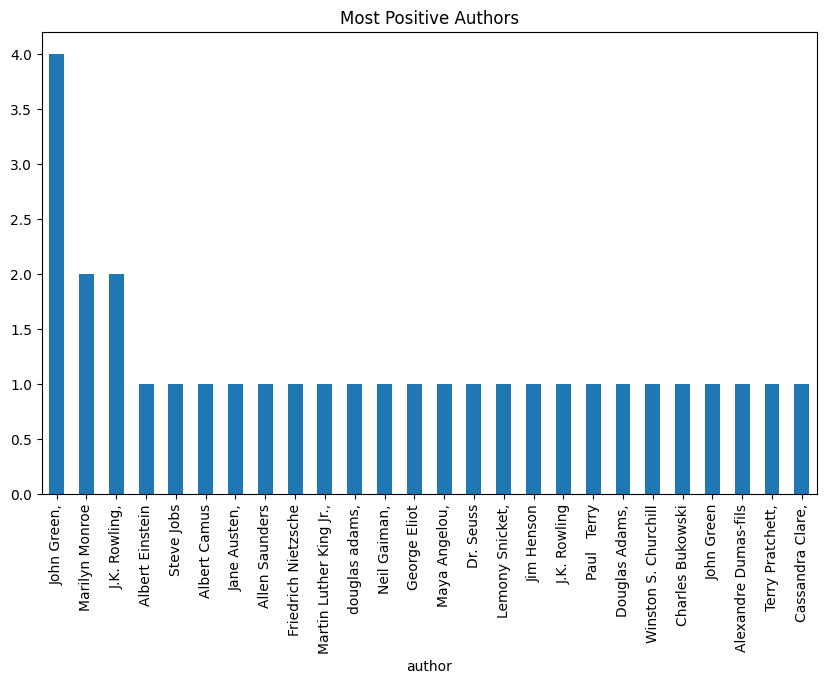

In [ ]:
# Most negative authors
df[df['sentiment'] == 'Negative']['author'].value_counts().plot(kind='bar', figsize=(10, 6), title='Most Positive Authors')


## Summary
- 53% quotes are Positive
- 26% quotes are Neutral
- 20% quotes are Negative
- J.K Rowling has most positive quotes
- John Green has most negative quotes